In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('BBBnew.xlsx')

In [3]:
df.head()

,KC291 data set / SMILES,No,Name,logBB,S1K,Xu,ALOGP,TPSA,SsssN,AbsCarboxy,Iv
0,[N][N],6,Nitrogen,0.030000,1.922,0.000,-1.191,52.04,0.0,0,1
1,[N-]=[N+]=O,7,Nitrous Oxide,0.030000,2.325,1.655,-1.467,53.47,0.0,0,1
2,[H]C([H])([H])[H],8,Methane,0.030000,0.000,0.000,1.376,0.00,0.0,0,1
3,CCCCC,9,Pentane,0.632423,5.000,4.593,2.653,0.00,0.0,0,1
4,CCCCCC,10,Hexane,0.680000,6.000,5.969,3.109,0.00,0.0,0,1


In [4]:
df.shape

(291, 11)

In [5]:
smiles = df.pop('KC291 data set / SMILES')
names = df.pop('Name')
y = df.pop('logBB')

df.drop('No', axis=1, inplace=True)

In [6]:
df.head()

,S1K,Xu,ALOGP,TPSA,SsssN,AbsCarboxy,Iv
0,1.922,0.000,-1.191,52.04,0.0,0,1
1,2.325,1.655,-1.467,53.47,0.0,0,1
2,0.000,0.000,1.376,0.00,0.0,0,1
3,5.000,4.593,2.653,0.00,0.0,0,1
4,6.000,5.969,3.109,0.00,0.0,0,1


In [7]:
df.describe(include='all')

,S1K,Xu,ALOGP,TPSA,SsssN,AbsCarboxy,Iv
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,11.585082,15.197457,2.405474,43.568454,1.130170,0.030928,0.309278
std,5.566631,8.142240,1.541117,37.608549,1.701667,0.173420,0.462992
min,0.000000,0.000000,-2.940000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.804000,1.267000,9.230000,0.000000,0.000000,0.000000
50%,11.878000,16.415000,2.533000,40.460000,0.000000,0.000000,0.000000
75%,15.333500,20.906500,3.522000,65.630000,2.146690,0.000000,1.000000
max,36.601000,41.856000,6.142000,191.040000,6.657350,1.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42)

In [9]:
print('Shape of Train: ', X_train.shape)
print('Shape of Test : ', X_test.shape)

Shape of Train:  (232, 7)
Shape of Test :  (59, 7)


### Min Max Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Check the data for correlation and collinearity

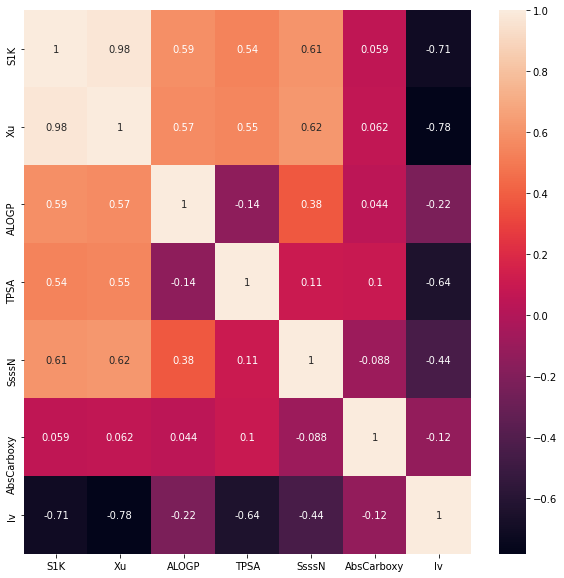

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(X_train,columns=df.columns).corr(),annot=True);

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = pd.DataFrame(X_train,columns=df.columns)
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,143.574006,S1K
1,156.961762,Xu
2,20.925427,ALOGP
3,6.800734,TPSA
4,3.062152,SsssN
5,1.085256,AbsCarboxy
6,2.952637,Iv


c:\users\jason\centralenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


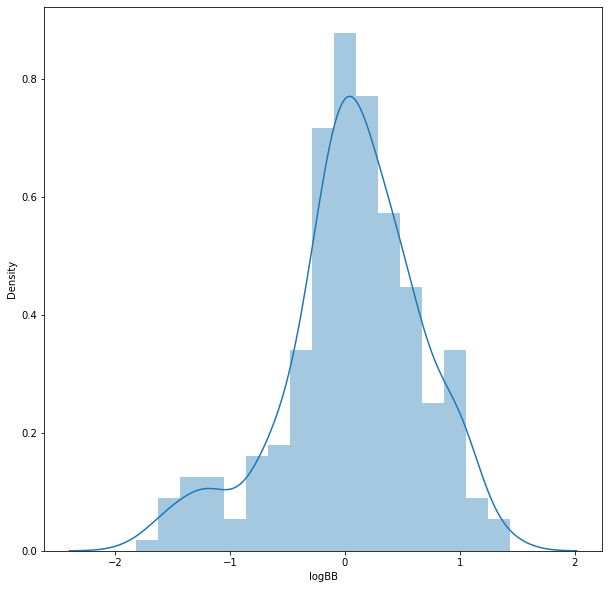

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(y);

<Figure size 720x720 with 0 Axes>

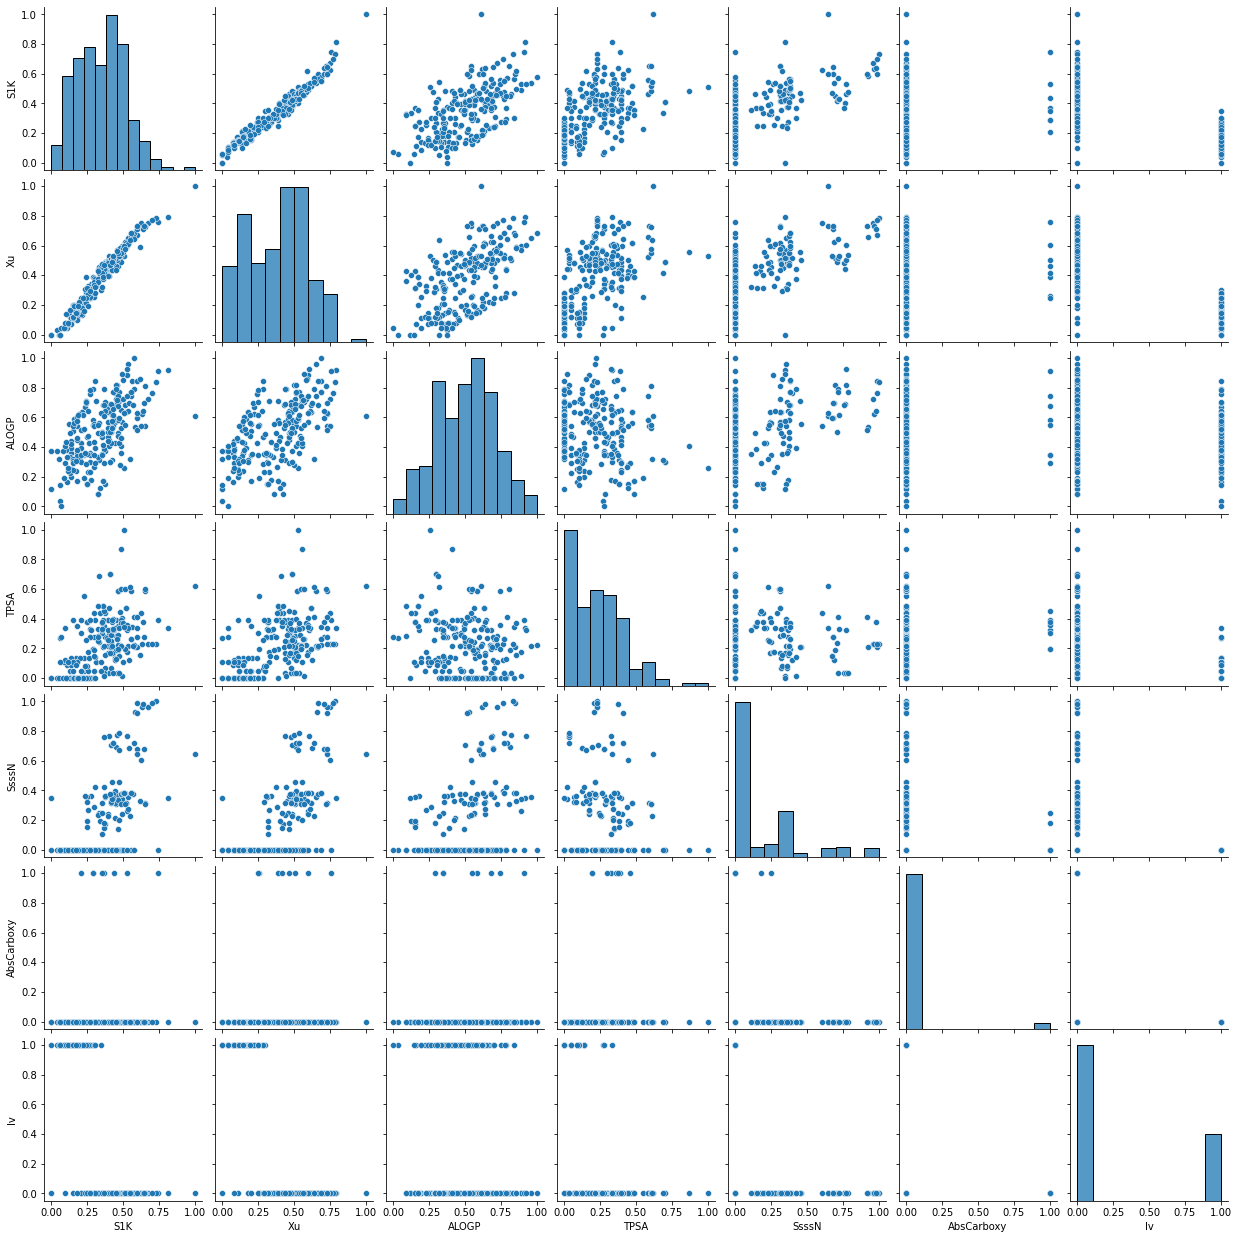

In [14]:
plt.figure(figsize=(10,10));
sns.pairplot(pd.DataFrame(X_train,columns=df.columns))

## Creating and Training the Model

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

reg = ExtraTreesRegressor(n_estimators=100,min_samples_split=2,max_depth=9,n_jobs=-1, random_state=42).fit(X_train, y_train)

In [16]:
cross_scores = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=4, n_jobs=-1)

In [17]:
print('Cross Validation Scores: ', cross_scores)
print('Cross Validation Mean  : ', cross_scores.mean())
print('Train R^2              : ', reg.score(X_train, y_train))
print('Test  R^2              : ', reg.score(X_test, y_test))

Cross Validation Scores:  [0.67240972 0.68383848 0.70952286 0.66144036]
Cross Validation Mean  :  0.6818028537082172
Train R^2              :  0.9342840368300345
Test  R^2              :  0.7039440309673817


## Model Evaluation

#### Train Set

In [19]:
train_preds = reg.predict(X_train)

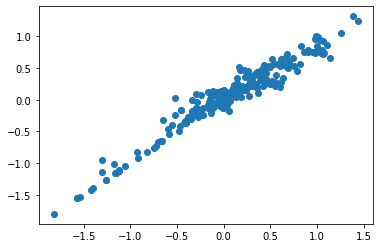

In [20]:
plt.scatter(y_train,train_preds)

**Residual Histogram**

c:\users\jason\centralenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


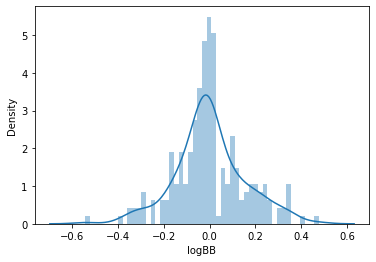

In [21]:
sns.distplot((y_train-train_preds),bins=50);

In [22]:
print('MAE:', metrics.mean_absolute_error(y_train, train_preds))
print('MSE:', metrics.mean_squared_error(y_train, train_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))
print('R2 Score:',metrics.r2_score(y_train, train_preds))
print('Adjusted R2 Score:',  1-(1-metrics.r2_score(y_train, train_preds))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Explained Variance:', metrics.explained_variance_score(y_train, train_preds))

MAE: 0.11031192720842392
MSE: 0.023448249765912487
RMSE: 0.1531282134876277
R2 Score: 0.9342840368300345
Adjusted R2 Score: 0.9322304129809731
Explained Variance: 0.9342840368300345


#### Test Set

In [23]:
test_preds = reg.predict(X_test)

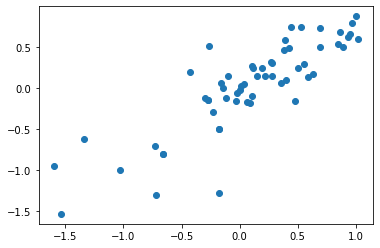

In [24]:
plt.scatter(y_test,test_preds)

**Residual Histogram**

c:\users\jason\centralenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


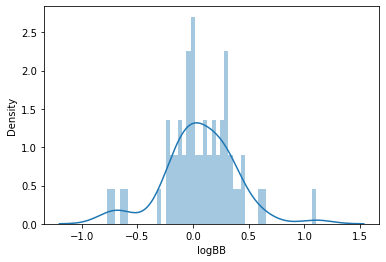

In [25]:
sns.distplot((y_test-test_preds),bins=50);

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, test_preds))
print('MSE:', metrics.mean_squared_error(y_test, test_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_preds)))
print('R2 Score:',metrics.r2_score(y_test, test_preds))
print('Adjusted R2 Score:',  1-(1-metrics.r2_score(y_test, test_preds))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Explained Variance:', metrics.explained_variance_score(y_test, test_preds))

MAE: 0.2382483728843656
MSE: 0.1056530342722638
RMSE: 0.32504312678822145
R2 Score: 0.7039440309673817
Adjusted R2 Score: 0.6633088979629047
Explained Variance: 0.7145710497706631
